In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as pl
from mpl_toolkits.mplot3d import Axes3D

""" This is code for simple GP regression. It assumes a zero mean GP Prior """

' This is code for simple GP regression. It assumes a zero mean GP Prior '

In [2]:
%matplotlib inline

In [3]:
# Dot product measures similarity
# https://youtu.be/4vGiHC35j9s?t=512

x1 = [0,1]
x2 = [1,0]

np.dot(x1,x2)


0

In [4]:
np.dot(x1,x1)

1

In [5]:
x1x2= np.mgrid[-2:2.1:0.5, -2:2.1:0.5].reshape(2,-1).T


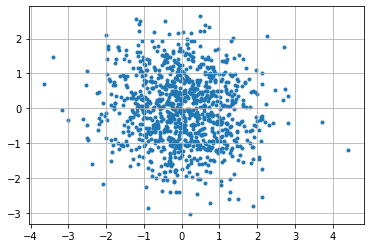

In [6]:
#2d gaussian
X = np.random.normal(loc=0, scale=1, size=1000)
Y = np.random.normal(loc=0, scale=1, size=1000)

pl.scatter(X,Y, marker=".")
pl.grid()


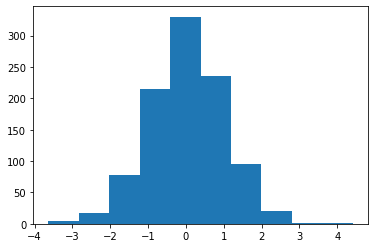

In [7]:
pl.hist(X)
pl.show()

(1000, 2)


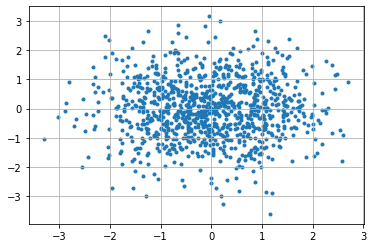

In [8]:
#2d gaussian (identity covariance)
X = np.random.multivariate_normal(mean=(0,0), cov=[[1,0],[0,1]], size=1000)
print(np.shape(X))
pl.scatter(X[:,0], X[:,1], marker=".")
pl.grid()

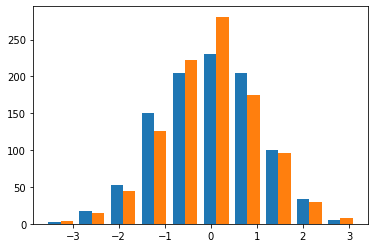

In [9]:
pl.hist(X)
pl.show()

(10000, 2)


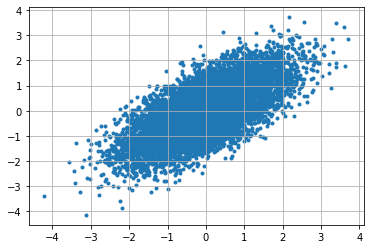

In [10]:
#2d gaussian (covariance with correlation)
X = np.random.multivariate_normal(mean=(0,0), cov=[[1,0.7],[0.7,1]], size=10000)
print(np.shape(X))
pl.scatter(X[:,0], X[:,1], marker=".")
pl.grid()

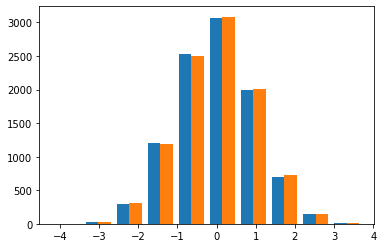

In [11]:
pl.hist(X)
pl.show()

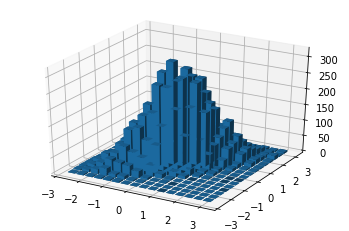

In [12]:
fig = pl.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(X[:,0], X[:,1], bins=16, range=[[-3, 3], [-3, 3]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.30 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
pl.show()

(1000, 2)


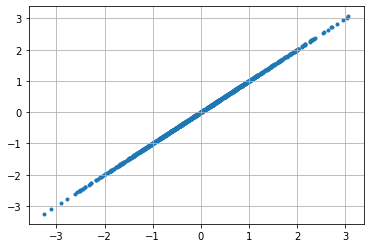

In [13]:
#2d gaussian (completely dependant variables/linear combination)
X = np.random.multivariate_normal(mean=(0,0), cov=[[1,1],[1,1]], size=1000)
print(np.shape(X))
pl.scatter(X[:,0], X[:,1], marker=".")
pl.grid()

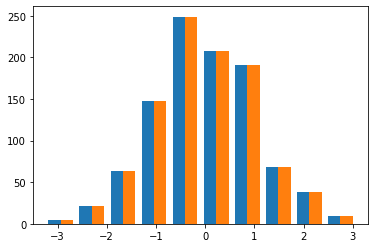

In [14]:
pl.hist(X)
pl.show()

(500, 3)


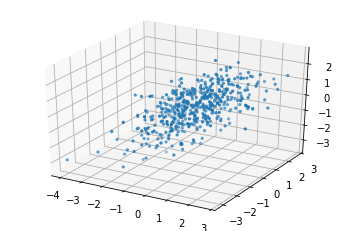

In [15]:
#2d gaussian (covariance with some correlation)
X = np.random.multivariate_normal(mean=(0,0,0), cov=[[1  , 0.5, 0.5],
                                                   [0.5, 1  , 0.5],
                                                   [0.5, 0.5, 1  ]], size=500)
print(np.shape(X))
from mpl_toolkits.mplot3d import Axes3D
fig = pl.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], marker=".")

In [16]:
# This is the true unknown function we are trying to approximate
f1 = lambda x: np.sin(0.9*x).flatten()
f2 = lambda x: (0.25*(x**2)).flatten()

f=f2

In [17]:
# Define the kernel
def kernel(a, b):
    """ GP squared exponential kernel """
    kernelParameter = 1
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/kernelParameter) * sqdist)

In [120]:
N = 2           # number of training points.
n_test = 100    # number of test points.
s = 0.005        # noise variance.

In [121]:
# Sample some input points and noisy versions of the function evaluated at
# these points. 
X = np.random.uniform(-5, 5, size=(N,1))
y = f(X) + s*np.random.randn(N)

In [122]:
K = kernel(X, X)
L = np.linalg.cholesky(K + 1.0*s*np.eye(N))

In [123]:
# points we're going to make predictions at.
Xtest = np.linspace(-5, 5, n_test).reshape(-1,1)

In [124]:
# compute the mean at our test points.
Lk = np.linalg.solve(L, kernel(X, Xtest))
mu = np.dot(Lk.T, np.linalg.solve(L, y))

In [125]:
# compute the variance at our test points.
K_ = kernel(Xtest, Xtest)
s2 = np.diag(K_) - np.sum(Lk**2, axis=0)
s = np.sqrt(s2)

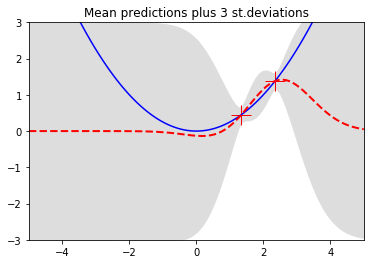

In [126]:
# PLOTS:
pl.figure(1)
pl.clf()
pl.plot(X, y, 'r+', ms=20)
pl.plot(Xtest, f(Xtest), 'b-')
#Variance
pl.gca().fill_between(Xtest.flat, mu-3*s, mu+3*s, color="#dddddd")
pl.plot(Xtest, mu, 'r--', lw=2)
pl.savefig('predictive.png', bbox_inches='tight')
pl.title('Mean predictions plus 3 st.deviations')
pl.axis([-5, 5, -3, 3])
pl.show()

In [127]:
n_samples = 3
points = np.random.normal(size=(n_test, n_samples))

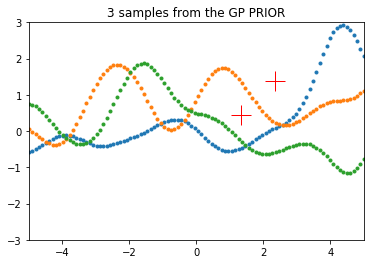

In [128]:
# draw samples from the prior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n_test))
f_prior = np.dot(L, points)
pl.figure(2)
pl.clf()
pl.plot(Xtest, f_prior, marker='.', linestyle=' ')
pl.title(str(n_samples)+' samples from the GP PRIOR')
pl.axis([-5, 5, -3, 3])
pl.plot(X, y, 'r+', ms=20)
pl.savefig('prior.png', bbox_inches='tight')
pl.show()

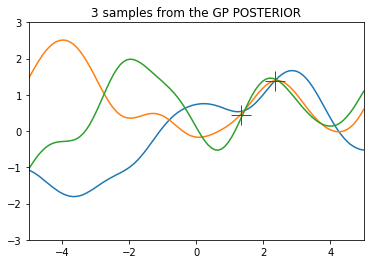

In [129]:
# draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n_test) - np.dot(Lk.T, Lk))
n_samples = 3
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n_test, n_samples)))
pl.figure(3)
pl.clf()
pl.plot(Xtest, f_post)
pl.title(str(n_samples)+' samples from the GP POSTERIOR')
pl.axis([-5, 5, -3, 3])
pl.plot(X, y, 'r+', ms=20)
pl.savefig('post.png', bbox_inches='tight')
pl.show()

In [ ]:
%matplotlib inline

In [ ]:
Fermat?

In [ ]:
# from __future__ import division
import numpy as np
import matplotlib.pyplot as pl
from fermat import Fermat
from scipy.spatial import distance_matrix

""" This is code for simple GP regression. It assumes a zero mean GP Prior """


# This is the true unknown function we are trying to approximate
f = lambda x: np.sin(0.9*x).flatten()
#f = lambda x: (0.25*(x**2)).flatten()


# Define the kernel
def squaredExponentialKernel(a, b):
    """ GP squared exponential kernel """
    kernelParameter = 1
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    print(np.exp(-.5 * (1/kernelParameter) * sqdist))
    return np.exp(-.5 * (1/kernelParameter) * sqdist)

def fermatKernel(a, b):
    # from fermat lib example:
    # compute euclidean distances between data points
    distances = distance_matrix(a, b)
    print("shape distances: ", np.shape(distances))
    # Initialize the fermat model
    # The distances would be computed used the aprox method
    # and the euclidean distances as input
    f = Fermat(alpha = 4, path_method='L', k=30, landmarks=30)
    # fit the Fermat model
    f.fit(distances)
    #print(f.get_distances()+ np.eye(len(a)))
    new_distances = f.get_distances()
    new_distances = new_distances / np.amax(new_distances)
    new_distances = new_distances + np.eye(len(a))
    return  new_distances
    

N = 2         # number of training points.
n = 20**2         # number of test points.
s = 0.05    # noise variance.

# Sample some input points and noisy versions of the function evaluated at
# these points. 
X = np.random.uniform(-5, 5, size=(N,1))
y = f(X) + s*np.random.randn(N)

##K = squaredExponentialKernel(X, X)
K = fermatKernel(X, X)
L = np.linalg.cholesky(K + 1.0*s*np.eye(N))

# points we're going to make predictions at.
Xtest = np.linspace(-5, 5, n).reshape(-1,1)


# compute the mean at our test points.
#Lk = np.linalg.solve(L, kernel(X, Xtest))
print("1. ", np.shape(fermatKernel(X, Xtest)))

Lk = np.linalg.solve(L, fermatKernel(X, Xtest))
mu = np.dot(Lk.T, np.linalg.solve(L, y))

# compute the variance at our test points.
##K_ = squaredExponentialKernel(Xtest, Xtest)
K_ = fermatKernel(Xtest, Xtest)
print("2. ", np.shape(K_))
print("2.5. ", np.shape(np.diag(K_)))
print("3. ", np.shape(Lk))
s2 = np.diag(K_) - np.sum(Lk**2, axis=0)
s = np.sqrt(s2)


# PLOTS:
pl.figure(1)
pl.clf()
pl.plot(X, y, 'r+', ms=20)
pl.plot(Xtest, f(Xtest), 'b-')
pl.gca().fill_between(Xtest.flat, mu-3*s, mu+3*s, color="#dddddd")
pl.plot(Xtest, mu, 'r--', lw=2)
pl.savefig('predictive.png', bbox_inches='tight')
pl.title('Mean predictions plus 3 st.deviations')
pl.axis([-5, 5, -3, 3])

# draw samples from the prior at our test points.
print(K_ + 1e-6*np.eye(n))
L = np.linalg.cholesky(K_ )#- 1e-6*np.eye(n))
f_prior = np.dot(L, np.random.normal(size=(n_test, 2)))
pl.figure(2)
pl.clf()
pl.plot(Xtest, f_prior)
pl.title('Ten samples from the GP prior')
pl.axis([-5, 5, -3, 3])
pl.savefig('prior.png', bbox_inches='tight')

# draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n_test, 2)))
pl.figure(3)
pl.clf()
pl.plot(Xtest, f_post)
pl.title('Ten samples from the GP posterior')
pl.axis([-5, 5, -3, 3])
pl.savefig('post.png', bbox_inches='tight')

pl.show()

In [ ]:
?Fermat